In [22]:
import pandas as pd
import matplotlib.pyplot as plt

youtube_df = pd.read_csv("datasets/youtube_cleaned.csv")
youtube_df['event_clean'] = youtube_df['event'].str.lower().str.strip()

# Convert views and likes to numeric in case they are strings
youtube_df['views'] = pd.to_numeric(youtube_df['views'], errors='coerce')
youtube_df['likes'] = pd.to_numeric(youtube_df['likes'], errors='coerce')

# Drop rows with missing key engagement metrics
youtube_df = youtube_df.dropna(subset=['views', 'likes'])

# Filter by event
wc_videos = youtube_df[youtube_df['event_clean'] == 'world cup']
ol_videos = youtube_df[youtube_df['event_clean'] == 'olympics']

print("World Cup entries:", len(wc_videos))
print("Olympics entries:", len(ol_videos))

World Cup entries: 289
Olympics entries: 291


/var/folders/lv/fm0yr04d2tz77p6w1vl9y72w0000gn/T/ipykernel_43649/792720427.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  youtube_df = pd.read_csv("datasets/youtube_cleaned.csv")


In [28]:
top_wc = wc_videos.sort_values(by='views', ascending=False).head(5)
top_ol = ol_videos.sort_values(by='views', ascending=False).head(5)

print("Top 5 World Cup YouTube Videos")
print(top_wc[['text', 'views', 'likes']])

print("\n Top 5 Olympics YouTube Videos")
print(top_ol[['text', 'views', 'likes']])

Top 5 World Cup YouTube Videos
                                                    text        views  \
6202   정국 Jung Kook (of BTS) featuring Fahad Al Kubai...  409296419.0   
582    정국 (Jung Kook) 'Dreamers' @ FIFA World Cup Qat...  200417611.0   
18062  Tukoh Taka - Official FIFA Fan Festival™ Anthe...  171366013.0   
14302  Hayya Hayya (Better Together) | FIFA World Cup...  136129393.0   
5191   Arhbo featuring Ozuna & GIMS | FIFA World Cup ...  133743839.0   

           likes  
6202   5958064.0  
582    4811645.0  
18062  1913260.0  
14302  1963575.0  
5191   1268632.0  

 Top 5 Olympics YouTube Videos
                                                    text       views  \
91158  Duplantis Wins The Olympics And Destroys The W...  97460038.0   
85111              The fastest man in history. Period. ⚡  66221411.0   
81341  A mesmerizing technical routine ❤️ Team Spain'...  46224940.0   
84400  When every rep brought you closer to your gold...  31548829.0   
94866                   

/var/folders/lv/fm0yr04d2tz77p6w1vl9y72w0000gn/T/ipykernel_43649/3291734651.py:13: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/lv/fm0yr04d2tz77p6w1vl9y72w0000gn/T/ipykernel_43649/3291734651.py:13: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/lv/fm0yr04d2tz77p6w1vl9y72w0000gn/T/ipykernel_43649/3291734651.py:13: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/pytho

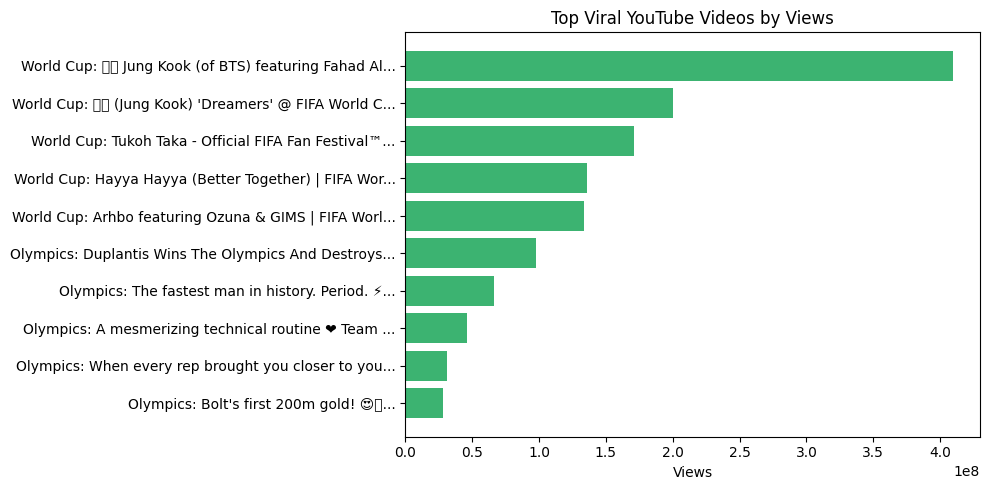

In [30]:
top_combined = pd.concat([top_wc, top_ol])
top_combined['label'] = top_combined['event_clean'].str.title() + ": " + top_combined['text'].str.slice(0, 40) + "..."

# Sort by views
top_combined = top_combined.sort_values(by='views', ascending=False)

plt.figure(figsize=(10, 5))
plt.barh(top_combined['label'], top_combined['views'], color='mediumseagreen')
plt.title('Top Viral YouTube Videos by Views')
plt.xlabel('Views')
plt.gca().invert_yaxis()  # Show highest at the top
plt.tight_layout()
plt.show()


/var/folders/lv/fm0yr04d2tz77p6w1vl9y72w0000gn/T/ipykernel_43649/2851088865.py:13: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/lv/fm0yr04d2tz77p6w1vl9y72w0000gn/T/ipykernel_43649/2851088865.py:13: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/lv/fm0yr04d2tz77p6w1vl9y72w0000gn/T/ipykernel_43649/2851088865.py:13: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/pytho

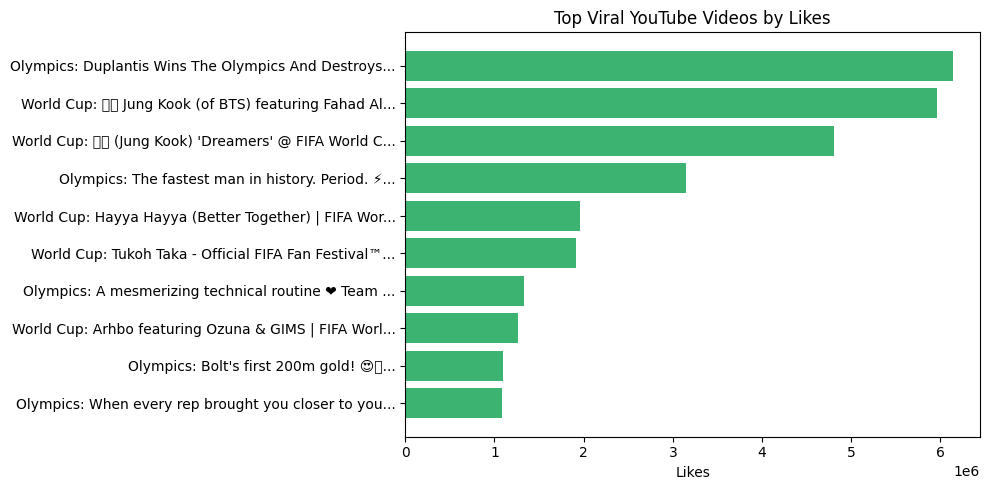

In [36]:
top_combined = pd.concat([top_wc, top_ol])
top_combined['label'] = top_combined['event_clean'].str.title() + ": " + top_combined['text'].str.slice(0, 40) + "..."

# Sort by views
top_combined = top_combined.sort_values(by='likes', ascending=False)

plt.figure(figsize=(10, 5))
plt.barh(top_combined['label'], top_combined['likes'], color='mediumseagreen')
plt.title('Top Viral YouTube Videos by Likes')
plt.xlabel('Likes')
plt.gca().invert_yaxis()  # Show highest at the top
plt.tight_layout()
plt.show()


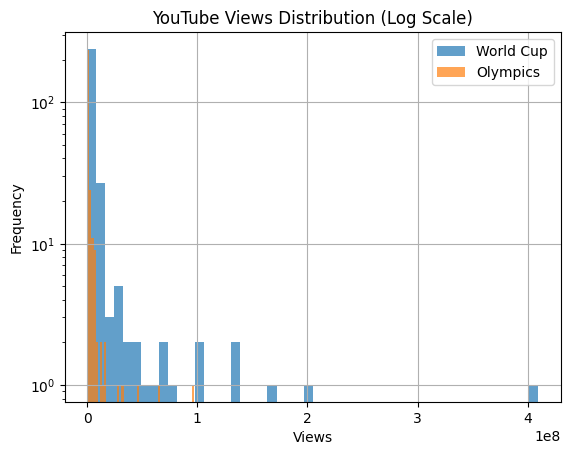

In [38]:
plt.hist(wc_videos['views'], bins=50, alpha=0.7, label='World Cup', log=True)
plt.hist(ol_videos['views'], bins=50, alpha=0.7, label='Olympics', log=True)
plt.title('YouTube Views Distribution (Log Scale)')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


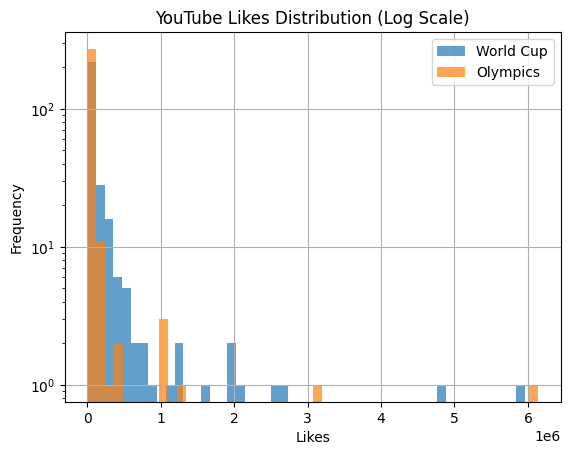

In [40]:
plt.hist(wc_videos['likes'], bins=50, alpha=0.7, label='World Cup', log=True)
plt.hist(ol_videos['likes'], bins=50, alpha=0.7, label='Olympics', log=True)
plt.title('YouTube Likes Distribution (Log Scale)')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


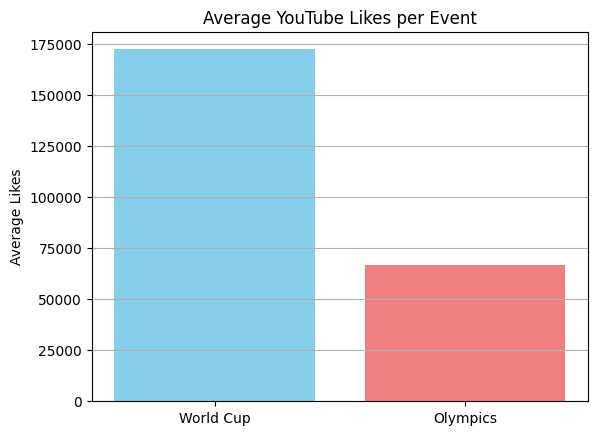

In [48]:
# Average Likes
avg_wc_likes = wc_videos['likes'].mean()
avg_ol_likes = ol_videos['likes'].mean()

plt.bar(['World Cup', 'Olympics'], [avg_wc_likes, avg_ol_likes], color=['skyblue', 'lightcoral'])
plt.title('Average YouTube Likes per Event')
plt.ylabel('Average Likes')
plt.grid(axis='y')
plt.show()

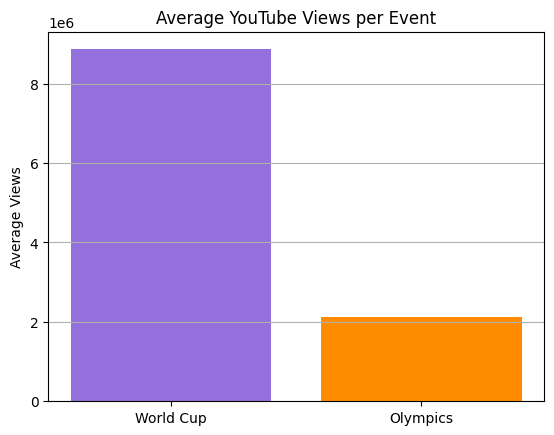

In [50]:
# Average Views
avg_wc_views = wc_videos['views'].mean()
avg_ol_views = ol_videos['views'].mean()

plt.bar(['World Cup', 'Olympics'], [avg_wc_views, avg_ol_views], color=['mediumpurple', 'darkorange'])
plt.title('Average YouTube Views per Event')
plt.ylabel('Average Views')
plt.grid(axis='y')
plt.show()

  event_clean                                               text  \
0   world cup                I miss you jungkook 😢 😔 😞 🥺🥺🥺🥺😭😭😭😭😭   
1   world cup                   Jungkook  you   are  amazing  ❤😊   
2    olympics  Update 2025: Mondo Duplantis just broke his ow...   
3   world cup  Sin maluma y sin mijans si seria cancion de mu...   
4    olympics  Australian breakdancer Raygun went viral at th...   

   comment_count  
0           5603  
1           3748  
2           3034  
3           2866  
4           2623  


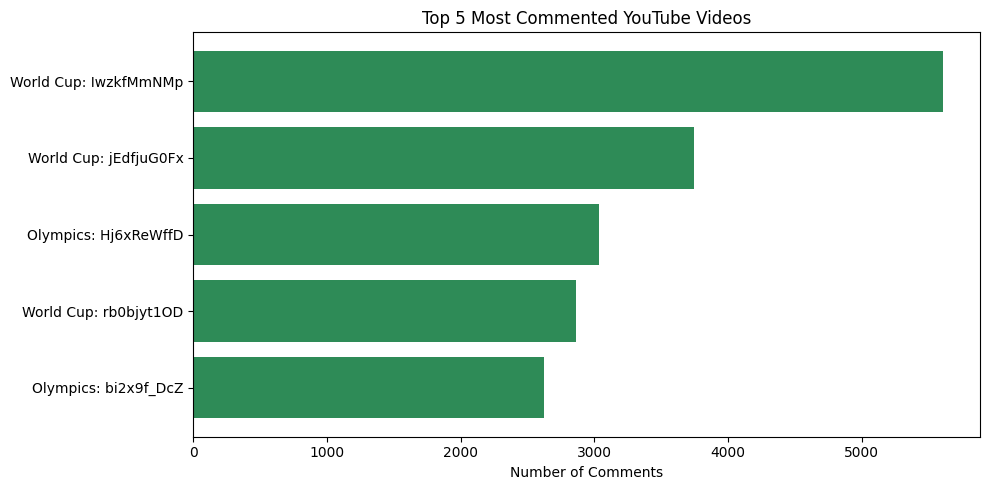

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Count how many comments per video
comment_counts = youtube_df['parent_id'].value_counts().rename_axis('video_id').reset_index(name='comment_count')

# Get metadata for each video (text + event)
video_meta = youtube_df.drop_duplicates(subset='parent_id')[['parent_id', 'text', 'event_clean']]

# Merge comment counts with metadata
merged = comment_counts.merge(video_meta, left_on='video_id', right_on='parent_id')

# Create readable label using text
merged['label'] = merged['event_clean'].str.title() + ": " + merged['video_id'].str.slice(0, 10)

# Sort by comment count and get top 5
most_commented = merged.sort_values(by='comment_count', ascending=False).head(5)
print(most_commented[['event_clean', 'text', 'comment_count']])

plt.figure(figsize=(10, 5))
plt.barh(most_commented['label'], most_commented['comment_count'], color='seagreen')
plt.xlabel('Number of Comments')
plt.title('Top 5 Most Commented YouTube Videos')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


['id', 'parent_id', 'text', 'author', 'views', 'likes', 'datetime', 'event', 'year', 'date', 'clean_text', 'event_clean']
